<a href="https://colab.research.google.com/github/ARYAA98/YoutubeDataAnalysis/blob/main/UK_YoutubeDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **YouTube Trending Videos Analysis Project**

This project leverages the YouTube Data API to collect trending video data from the United Kingdom. The project retrieves essential details about the most popular videos, such as: Video titles,Descriptions, Publish dates,View counts
,Likes, Comments, Content duration and Category

The collected data is stored in a CSV file, which can be used for further analysis, allowing insights into content trends, audience engagement, and performance metrics.

**Main Steps:**

Use the YouTube Data API to fetch Most Popular videos in the UK.

Extract relevant video metadata, statistics, and engagement metrics.

Save the collected data into a CSV file for future use and analysis.

**Requirements:**

API Key for YouTube Data API.

Pandas library for data manipulation.

Matplotlib and Seaborn for data visualization.

In [ ]:
import pandas as pd
from googleapiclient.discovery import build

# Replace with your own API key
API_KEY = 'REPLACE WITH YOUR KEY'

# Initialize YouTube API service
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Function to get category mapping for UK
def get_category_mapping(region_code='GB'):
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode=region_code  # Region code set to 'GB' for the UK
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# Function to fetch trending videos in the UK
def get_trending_videos(api_key, region_code='GB', max_results=200):
    # Build the YouTube service
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Initialize the list to hold video details
    videos = []

    # Fetch the most popular videos in the UK
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        chart='mostPopular',
        regionCode=region_code,  # Region set to UK
        maxResults=50  # Maximum videos per request
    )

    # Paginate through the results if max_results > 50
    while request and len(videos) < max_results:
        response = request.execute()
        for item in response['items']:
            video_details = {
                'video_id': item['id'],
                'title': item['snippet']['title'],
                'description': item['snippet']['description'],
                'published_at': item['snippet']['publishedAt'],
                'channel_id': item['snippet']['channelId'],
                'channel_title': item['snippet']['channelTitle'],
                'category_id': int(item['snippet']['categoryId']),
                'tags': item['snippet'].get('tags', []),
                'duration': item['contentDetails']['duration'],
                'definition': item['contentDetails']['definition'],
                'caption': item['contentDetails'].get('caption', 'false'),
                'view_count': int(item['statistics'].get('viewCount', 0)),
                'like_count': int(item['statistics'].get('likeCount', 0)),
                'comment_count': int(item['statistics'].get('commentCount', 0))
            }
            videos.append(video_details)

        # Get the next page token
        request = youtube.videos().list_next(request, response)

    return videos[:max_results]

# Function to save the trending videos to CSV
def save_to_csv(data, filename):
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

# Main function to execute the process
def main():
    # Get the category mapping for the UK
    category_mapping = get_category_mapping()

    # Fetch trending videos for the UK
    trending_videos = get_trending_videos(API_KEY)

    # Convert to DataFrame
    df = pd.DataFrame(trending_videos)

    # Map category names to category IDs
    df['category_name'] = df['category_id'].map(category_mapping)

    # Save the final DataFrame to CSV
    filename = 'uk_trending_videos_with_categories.csv'
    save_to_csv(df, filename)
    print(f'Trending videos saved to {filename}')

if __name__ == '__main__':
    main()


Trending videos saved to uk_trending_videos_with_categories.csv


In [ ]:
# Importing the pandas library for data manipulation
import pandas as pd

# Read the CSV file into a DataFrame
trending_videos = pd.read_csv('uk_trending_videos_with_categories.csv')

# Display the first few rows of the DataFrame
trending_videos.head()

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,comment_count,category_name
0,MD7v0-igVIM,Singham Again | Official Trailer | A Rohit She...,Aa rahi aap ki favourite cop universe aapke sa...,2024-10-07T07:43:56Z,UCcXQd6kHKm0b41x8zMVMmMg,JioStudios,24,"['singham again ajay devgn', 'singam 3 movie',...",PT4M58S,hd,True,26858093,602792,49809,Entertainment
1,7vA55lfhTno,I REBUILT A WRECKED LAMBORGHINI URUS THEN GAVE...,Grab a YFood Taster Pack here - https://bit.ly...,2024-10-06T17:00:10Z,UCcLYOTz3ct6_lk9iLToxxAw,Mat Armstrong,2,"['mat armstrong', 'matt armstrong', 'copart re...",PT37M8S,hd,False,2204600,145937,4185,Autos & Vehicles
2,Vm_UeYVOWFI,Destiny 2: Revenant | Launch Trailer,"Fikrul, the Fanatic, has re-emerged with an ar...",2024-10-07T15:00:36Z,UC52XYgEExV9VG6Rt-6vnzVA,Destiny 2,20,"['Destiny', 'destiny 2', 'xbox', 'playstation'...",PT1M47S,hd,False,237168,15768,1842,Gaming
3,cpe6QrExXFs,"Autumn Bucket List, Halloween Haul & Snack Tas...","Autumn Bucket List, Halloween Haul & Snack Tas...",2024-10-06T18:20:57Z,UCrUbqTCagwsaP2Fmr0p1TsA,Zoe Sugg,22,"['Zoe Sugg', 'vlog', 'Zoella', 'makeup', 'grwm...",PT54M22S,hd,False,273623,14004,309,People & Blogs
4,wGAhlQ8vGfI,I'm getting cooked...,KSI - Thick Of It (feat. Trippie Redd) \nListe...,2024-10-05T17:27:35Z,UCGmnsW623G1r-Chmo5RB4Yw,JJ Olatunji,24,"['ksi', 'ksiolajidebt', 'ksiolajidebthd', 'jj ...",PT17M52S,hd,False,2197626,132180,21242,Entertainment


In [ ]:
# check for missing values
missing_values = trending_videos.isnull().sum()

# display data types
data_types = trending_videos.dtypes

missing_values, data_types

(video_id         0
 title            0
 description      2
 published_at     0
 channel_id       0
 channel_title    0
 category_id      0
 tags             0
 duration         0
 definition       0
 caption          0
 view_count       0
 like_count       0
 comment_count    0
 category_name    0
 dtype: int64,
 video_id         object
 title            object
 description      object
 published_at     object
 channel_id       object
 channel_title    object
 category_id       int64
 tags             object
 duration         object
 definition       object
 caption            bool
 view_count        int64
 like_count        int64
 comment_count     int64
 category_name    object
 dtype: object)

The data have 2 missing value in the column " description". This needs to be handled. The datatype for the column "published" should be in datetime format and the column "tags" also needs a change.

In [ ]:
# Fill missing descriptions with 'No description'
trending_videos['description'].fillna('No description', inplace=True)

# Convert 'published_at' to datetime
trending_videos['published_at'] = pd.to_datetime(trending_videos['published_at'])

# Convert tags from string to list
trending_videos['tags'] = trending_videos['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Check for missing values
missing_values = trending_videos.isnull().sum()

print(f"Missing values:\n{missing_values}")


Missing values:
video_id         0
title            0
description      0
published_at     0
channel_id       0
channel_title    0
category_id      0
tags             0
duration         0
definition       0
caption          0
view_count       0
like_count       0
comment_count    0
category_name    0
dtype: int64


## Exploratory Data Analysis

In [ ]:
# Descriptive statistics
descriptive_stats = trending_videos[['view_count', 'like_count', 'comment_count']].describe()
print(descriptive_stats)

         view_count    like_count  comment_count
count  2.000000e+02  2.000000e+02     200.000000
mean   1.764889e+06  7.432390e+04    5519.240000
std    3.225500e+06  1.554665e+05   12034.730636
min    9.355700e+04  8.240000e+02       0.000000
25%    4.034748e+05  1.575950e+04    1205.750000
50%    9.048040e+05  3.385350e+04    2606.000000
75%    1.618724e+06  7.902125e+04    5375.500000
max    2.685809e+07  1.742266e+06  122852.000000


The average view count for trending videos is around 1.76 million, with a wide range from 93,557 views to over 26.8 million views.

Likes range from as low as 8 to over 1.74 million, with an average of around 74,323 likes per video.

Comments vary greatly, from videos with no comments to highly engaged ones with up to 122,852 comments, with a median of 2,606 comments.

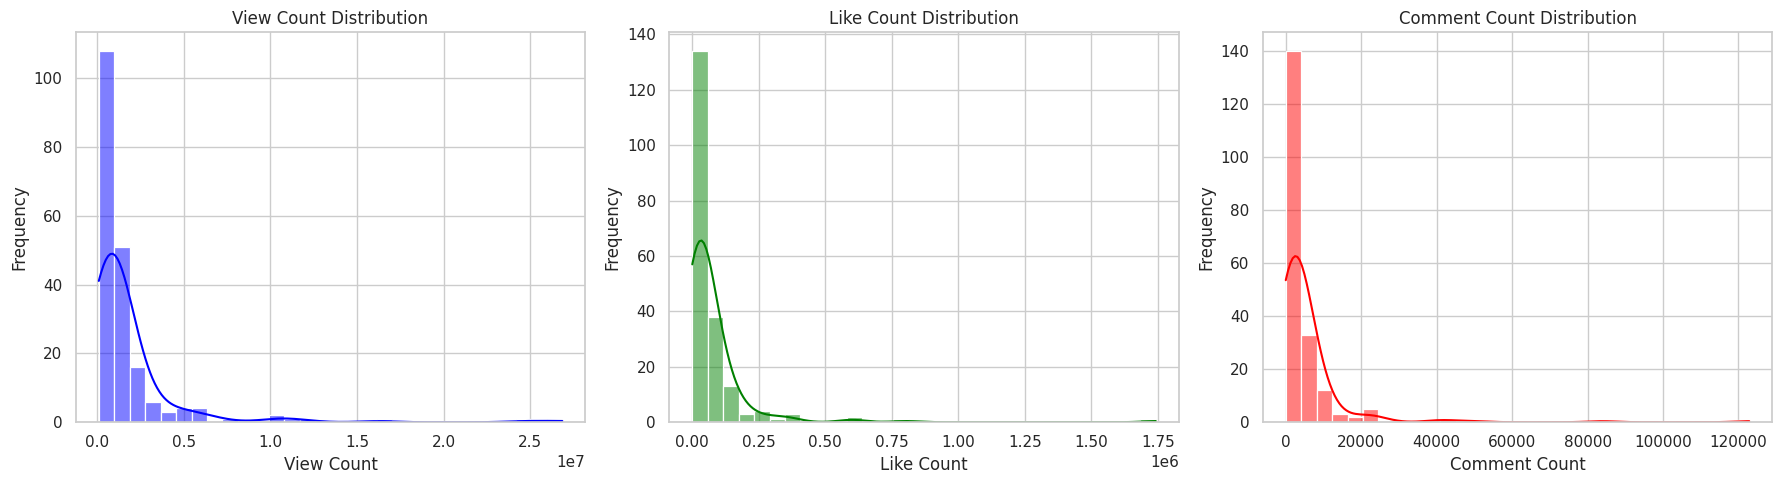

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(trending_videos['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')

# like count distribution
sns.histplot(trending_videos['like_count'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(trending_videos['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**View Count Distribution:**
The majority of trending videos have a view count between 0 and 5 million views, with a small number of outliers reaching up to 26.8 million views. This distribution is heavily skewed to the right, suggesting that most videos have moderate views, while a few videos experience viral popularity.

**Like Count Distribution:**
Similar to views, the like count also exhibits a right-skewed distribution, with most videos receiving fewer than 50,000 likes. A few exceptional videos receive as many as 1.74 million likes, indicating a small proportion of highly popular content.

**Comment Count Distribution:**
The comment count follows a comparable right-skewed pattern, with the bulk of videos having fewer than 10,000 comments, and only a handful of videos surpassing 100,000 comments. This reflects the limited user interaction through comments, while a select few generate extensive discussion.

### Correlation Analysis between Views, Likes and Comments

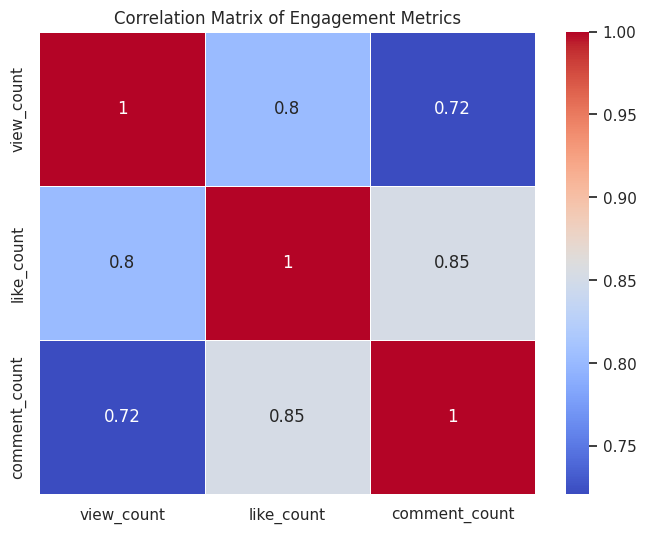

In [ ]:
# Correlation matrix
correlation_matrix = trending_videos[['view_count', 'like_count', 'comment_count']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

**View Count and Like Count:** There is a strong positive correlation (0.8) between the number of views and the number of likes. This indicates that videos with more views generally tend to receive more likes.

**View Count and Comment Count:** The correlation between view count and comment count is 0.72, showing a moderately strong relationship. This suggests that while videos with higher view counts typically have more comments, it's not as strong a correlation as with likes.

**Like Count and Comment Count:** There is a very strong positive correlation (0.85) between like count and comment count. This suggests that videos that receive more likes are also likely to engage viewers more in the comments section.

### Trending videos by category

In [ ]:
from googleapiclient.discovery import build

API_KEY = 'REPLACE WITH YOUR KEY'
youtube = build('youtube', 'v3', developerKey=API_KEY)

def get_category_mapping():
    request = youtube.videoCategories().list(
        part='snippet',
        regionCode='GB'  # Change to UK
    )
    response = request.execute()
    category_mapping = {}
    for item in response['items']:
        category_id = int(item['id'])
        category_name = item['snippet']['title']
        category_mapping[category_id] = category_name
    return category_mapping

# Get the category mapping
category_mapping = get_category_mapping()
print(category_mapping)


{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


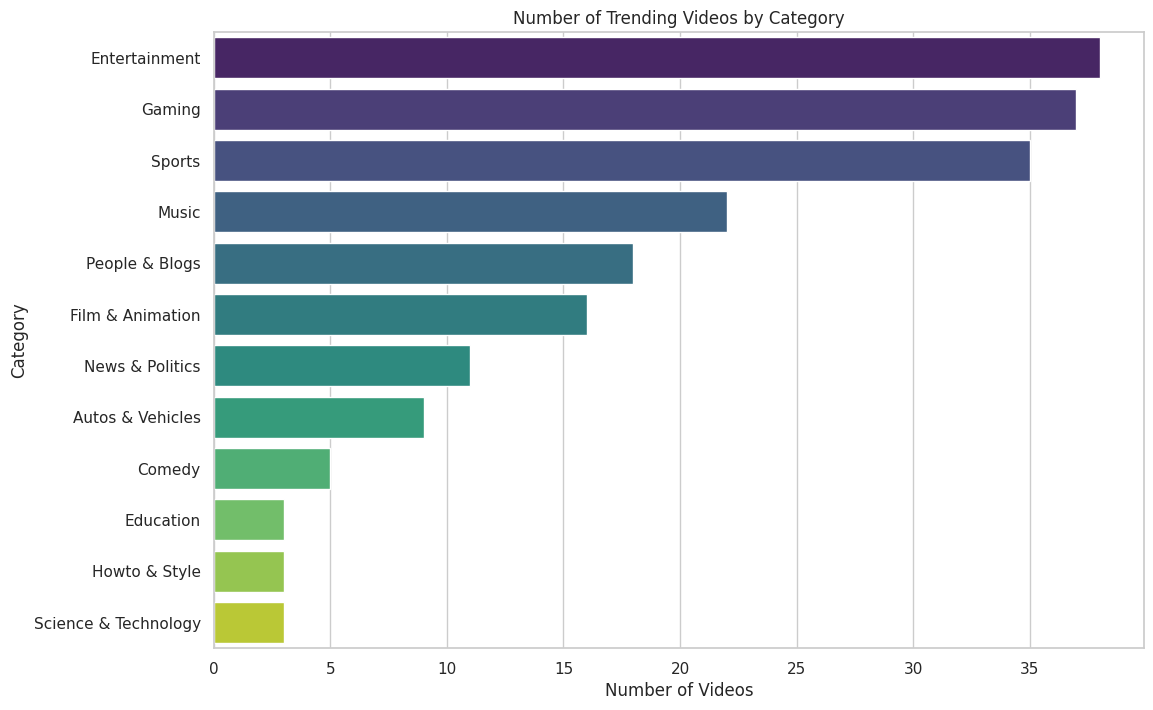

In [ ]:
trending_videos['category_name'] = trending_videos['category_id'].map(category_mapping)

# Bar chart for category counts
plt.figure(figsize=(12, 8))
sns.countplot(y=trending_videos['category_name'], order=trending_videos['category_name'].value_counts().index, palette='viridis')
plt.title('Number of Trending Videos by Category')
plt.xlabel('Number of Videos')
plt.ylabel('Category')
plt.show()

Entertainment, Gaming, and Sports emerge as the top three categories with the highest number of trending videos. These categories account for the majority of the trending content, highlighting the strong user interest and engagement in these areas.

Other notable categories include Music, People & Blogs, and Film & Animation, indicating the diverse content consumption trends on YouTube.

Categories like Education and Science & Technology have fewer trending videos, suggesting lower visibility or niche audiences.

### Average Engagement Metrics

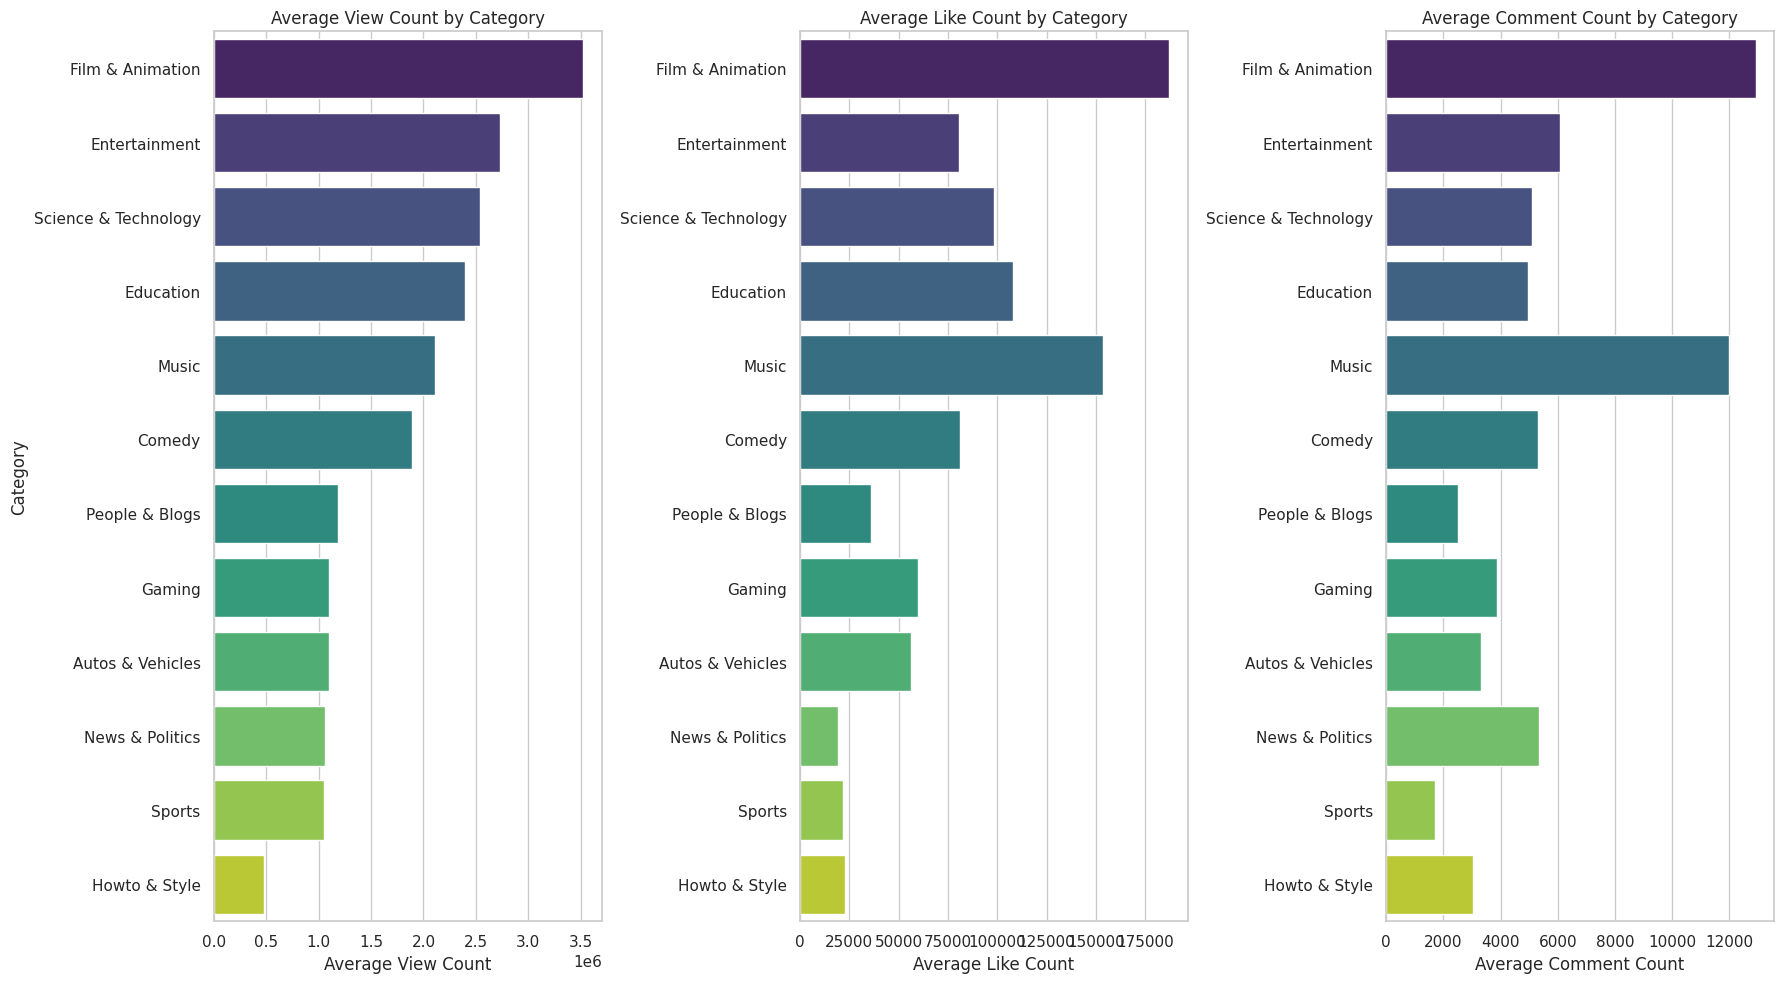

In [ ]:
# average engagement metrics by category
category_engagement = trending_videos.groupby('category_name')[['view_count', 'like_count', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')

# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['like_count'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

The charts above depict the average view count, average like count, and average comment count for trending YouTube videos by category. Key observations include:

Film & Animation leads in all three metrics, with the highest average views, likes, and comments, indicating strong engagement.
Entertainment and Science & Technology also perform consistently well across all three engagement metrics, suggesting high viewer interaction.
Categories like Music and Education see relatively high comment and like counts, while Gaming and People & Blogs rank lower in comparison across the board.
These insights highlight that certain content types, particularly Film & Animation, are highly engaging across multiple dimensions, making them dominant in trending content.

### Analysing the content and duration of the videos

In [ ]:
!pip install isodate
import isodate

# convert ISO 8601 duration to seconds
trending_videos['duration_seconds'] = trending_videos['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

trending_videos['duration_range'] = pd.cut(trending_videos['duration_seconds'], bins=[0, 300, 600, 1200, 3600, 7200], labels=['0-5 min', '5-10 min', '10-20 min', '20-60 min', '60-120 min'])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.0 MB/s eta 0:00:00


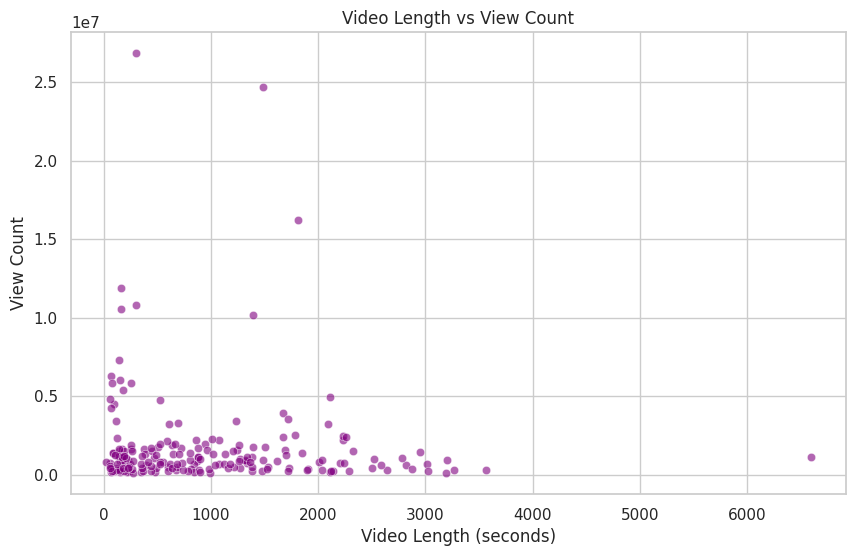

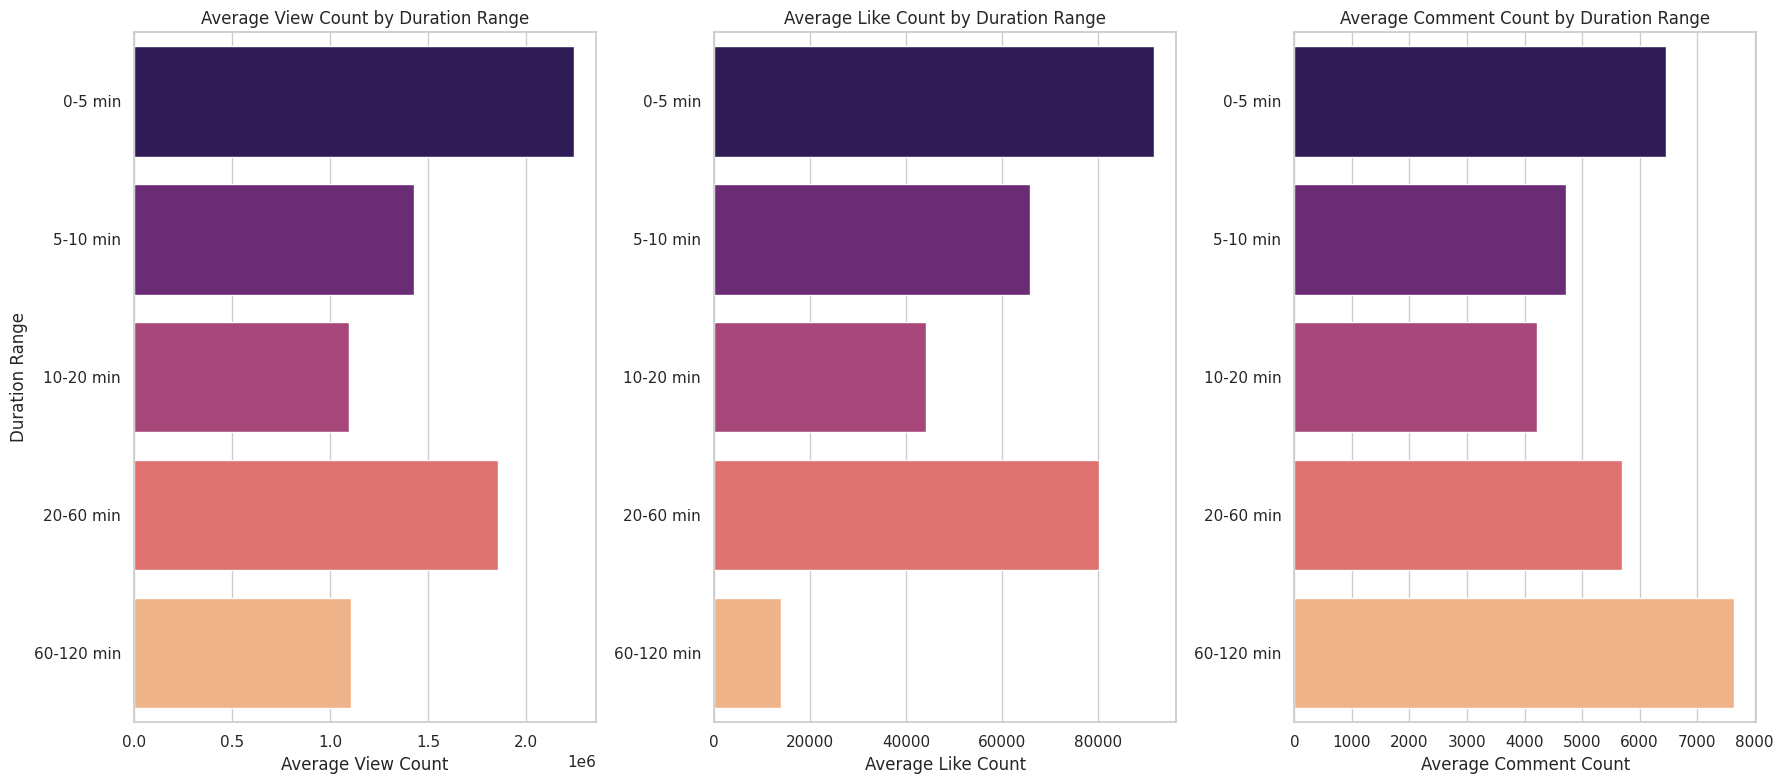

In [ ]:
# scatter plot for video length vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_seconds', y='view_count', data=trending_videos, alpha=0.6, color='purple')
plt.title('Video Length vs View Count')
plt.xlabel('Video Length (seconds)')
plt.ylabel('View Count')
plt.show()

# bar chart for engagement metrics by duration range
length_engagement = trending_videos.groupby('duration_range')[['view_count', 'like_count', 'comment_count']].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# view count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['view_count'], ax=axes[0], palette='magma')
axes[0].set_title('Average View Count by Duration Range')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Duration Range')

# like count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['like_count'], ax=axes[1], palette='magma')
axes[1].set_title('Average Like Count by Duration Range')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by duration range
sns.barplot(y=length_engagement.index, x=length_engagement['comment_count'], ax=axes[2], palette='magma')
axes[2].set_title('Average Comment Count by Duration Range')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

### Views and no of tags

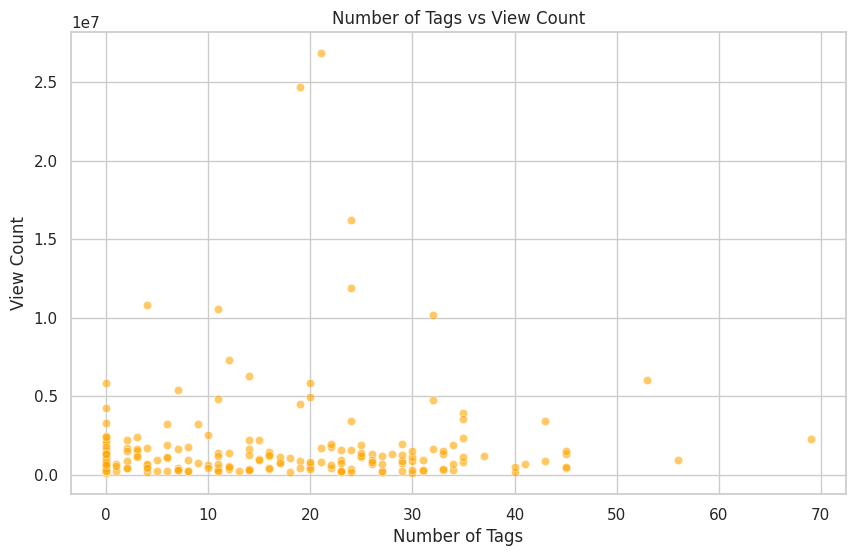

In [ ]:
# calculate the number of tags for each video
trending_videos['tag_count'] = trending_videos['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=trending_videos, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

In [ ]:
# Feature: Hour of day and day of week
trending_videos['publish_hour'] = trending_videos['published_at'].dt.hour
trending_videos['publish_day_of_week'] = trending_videos['published_at'].dt.day_name()

# Feature: Engagement rate (likes per view, comments per view)
trending_videos['like_view_ratio'] = trending_videos['like_count'] / trending_videos['view_count']
trending_videos['comment_view_ratio'] = trending_videos['comment_count'] / trending_videos['view_count']

# Feature: Title length and description length
trending_videos['title_length'] = trending_videos['title'].apply(len)
trending_videos['description_length'] = trending_videos['description'].apply(len)

# Fill NaNs for ratios
trending_videos[['like_view_ratio', 'comment_view_ratio']] = trending_videos[['like_view_ratio', 'comment_view_ratio']].fillna(0)

# Check newly created features
trending_videos[['publish_hour', 'publish_day_of_week', 'like_view_ratio', 'comment_view_ratio', 'title_length', 'description_length']].head()


,publish_hour,publish_day_of_week,like_view_ratio,comment_view_ratio,title_length,description_length
0,7,Monday,0.022444,0.001855,83,1602
1,17,Sunday,0.066197,0.001898,66,1246
2,15,Monday,0.066485,0.007767,36,1003
3,18,Sunday,0.051180,0.001129,60,3380
4,17,Saturday,0.060147,0.009666,21,311


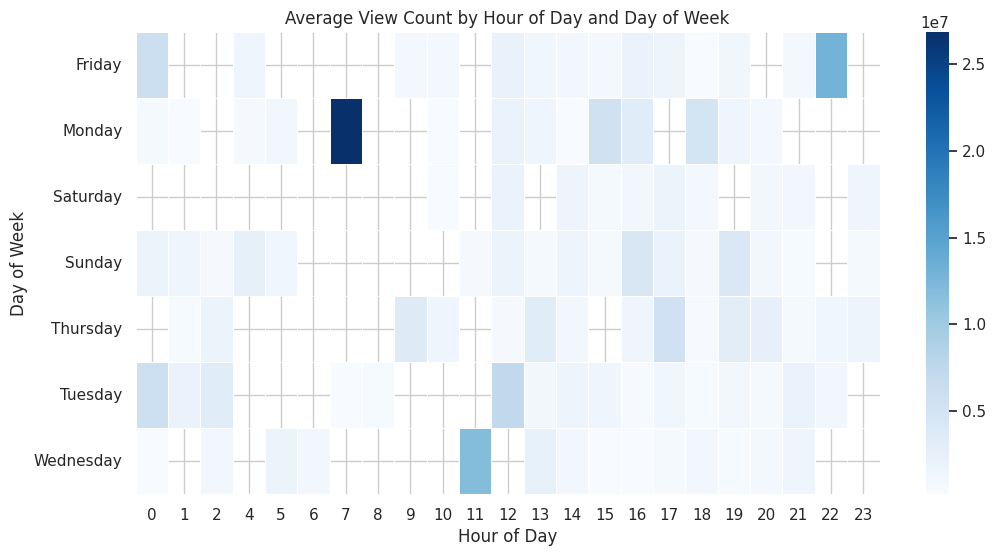

In [ ]:
import plotly.express as px
import seaborn as sns

# Heatmap: Engagement by publish hour and day of week
engagement_by_time = trending_videos.groupby(['publish_day_of_week', 'publish_hour']).agg({'view_count': 'mean'}).unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(engagement_by_time['view_count'], cmap='Blues', linewidths=0.5)
plt.title('Average View Count by Hour of Day and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# Interactive scatter plot: Views vs Likes with video length as marker size
fig = px.scatter(trending_videos,
                 x='view_count', y='like_count',
                 size='duration_seconds',
                 color='category_name',
                 hover_name='title',
                 title='Likes vs Views by Video Length and Category',
                 labels={'view_count': 'View Count', 'like_count': 'Like Count'})

fig.show()
